# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

Closed-form solution:
Intercept: 3.1052, Slope: 3.9844

Gradient Descent solution:
Intercept: 3.1052, Slope: 3.9844


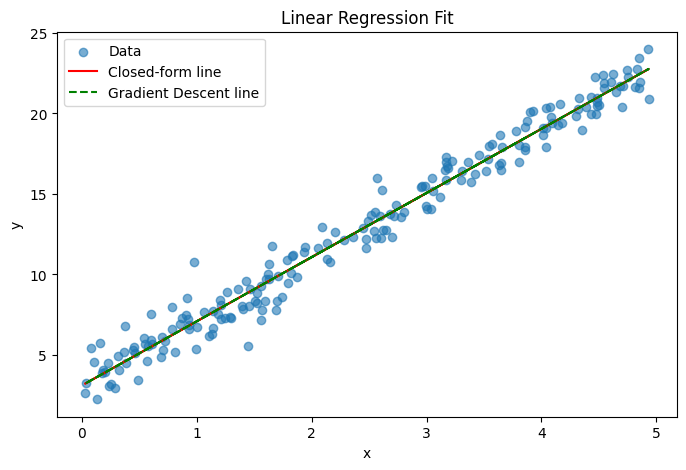

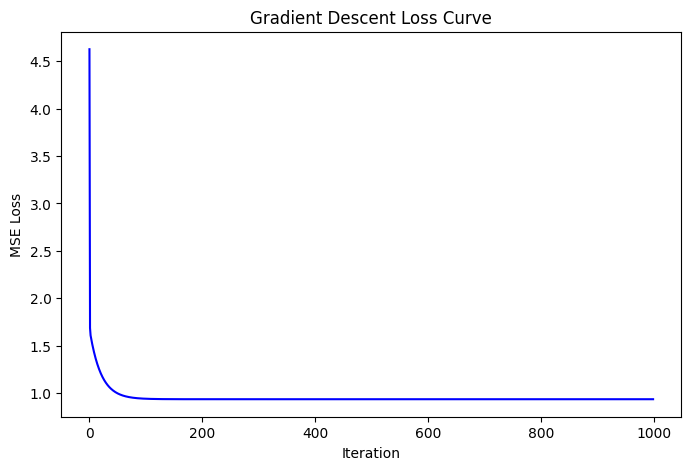

Hello World!


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Step 1: Generate synthetic data
# -------------------------
np.random.seed(42)  # reproducibility

n_samples = 200
X = np.random.uniform(0, 5, size=(n_samples, 1))
epsilon = np.random.normal(0, 1, size=(n_samples, 1))  # Gaussian noise
y = 3 + 4 * X + epsilon

# Add bias column (for intercept term)
X_b = np.c_[np.ones((n_samples, 1)), X]

# -------------------------
# Step 2: Closed-form (Normal Equation)
# -------------------------
theta_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_closed, slope_closed = theta_closed.ravel()
print("Closed-form solution:")
print(f"Intercept: {intercept_closed:.4f}, Slope: {slope_closed:.4f}")

# -------------------------
# Step 3: Gradient Descent Implementation
# -------------------------
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return np.mean((predictions - y) ** 2)

# Initialize
theta_gd = np.zeros((2, 1))   # [intercept, slope]
alpha = 0.05
n_iter = 1000
m = len(y)

losses = []

for i in range(n_iter):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd = theta_gd - alpha * gradients
    losses.append(compute_mse(X_b, y, theta_gd))

intercept_gd, slope_gd = theta_gd.ravel()
print("\nGradient Descent solution:")
print(f"Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

# -------------------------
# Step 4: Visualization
# -------------------------

# Plot raw data + fitted lines
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.6, label="Data")
plt.plot(X, intercept_closed + slope_closed * X, "r-", label="Closed-form line")
plt.plot(X, intercept_gd + slope_gd * X, "g--", label="Gradient Descent line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Plot loss curve
plt.figure(figsize=(8,5))
plt.plot(range(n_iter), losses, "b-")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss Curve")
plt.show()
print("Hello World!")
